In [ ]:
from google.colab import files

uploaded = files.upload()

Saving ecommerce retail.xlsx to ecommerce retail (1).xlsx


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "ecommerce retail.xlsx"
df1 = pd.read_excel(file_path, sheet_name = "ecommerce retail")
df2 = pd.read_excel(file_path, sheet_name = "Segmentation")



In [ ]:
df1 = df1.dropna(subset="CustomerID")
df1 = df1.drop(df1[df1["Quantity"] <= 0].index)
df1 = df1.drop(df1[df1["UnitPrice"] <= 0].index)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [ ]:
df1 = df1.sort_values(["CustomerID", "InvoiceDate"], ascending = [True, False])
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
535004,581180,23497,CLASSIC CHROME BICYCLE BELL,12,2011-12-07 15:52:00,1.45,12347.0,Iceland
535005,581180,23552,BICYCLE PUNCTURE REPAIR KIT,6,2011-12-07 15:52:00,2.08,12347.0,Iceland
535006,581180,21064,BOOM BOX SPEAKER BOYS,24,2011-12-07 15:52:00,1.25,12347.0,Iceland
535007,581180,84625A,PINK NEW BAROQUECANDLESTICK CANDLE,24,2011-12-07 15:52:00,0.85,12347.0,Iceland


In [ ]:
df1["revenue"] = df1["Quantity"]*df1["UnitPrice"]


In [ ]:
df1 = df1.groupby("CustomerID").agg({"revenue": "sum", "InvoiceDate": "max", "InvoiceNo": "nunique"}).reset_index()
df1.head()


,CustomerID,revenue,InvoiceDate,InvoiceNo
0,12346.0,77183.60,2011-01-18 10:01:00,1
1,12347.0,4310.00,2011-12-07 15:52:00,7
2,12348.0,1797.24,2011-09-25 13:13:00,4
3,12349.0,1757.55,2011-11-21 09:51:00,1
4,12350.0,334.40,2011-02-02 16:01:00,1


In [ ]:
df1["InvoiceDate"] = pd.to_datetime("2011-12-31") - df1["InvoiceDate"]
df1["InvoiceDate"] = df1["InvoiceDate"].dt.days
df1.head()

,CustomerID,revenue,InvoiceDate,InvoiceNo
0,12346.0,77183.60,346,1
1,12347.0,4310.00,23,7
2,12348.0,1797.24,96,4
3,12349.0,1757.55,39,1
4,12350.0,334.40,331,1


In [ ]:
df1["R_score"] = pd.qcut(df1["InvoiceDate"], 5, labels = ["5", "4", "3", "2", "1"])


In [ ]:
df1["InvoiceNo"] = df1["InvoiceNo"].rank(axis= 0, method= "first")
df1["F_score"] = pd.qcut(df1["InvoiceNo"], 5, labels = ["1", "2", "3", "4", "5"] )


In [ ]:
df1["M_score"] = pd.qcut(df1["revenue"], 5, labels=["1", "2", "3", "4", "5"])
df1.head()

,CustomerID,revenue,InvoiceDate,InvoiceNo,R_score,F_score,M_score
0,12346.0,77183.60,346,1.0,1,1,5
1,12347.0,4310.00,23,3639.0,5,5,5
2,12348.0,1797.24,96,2837.0,2,4,4
3,12349.0,1757.55,39,2.0,4,1,4
4,12350.0,334.40,331,3.0,1,1,2


In [ ]:
df1["RFM Score"] = df1["R_score"].astype(str) + df1["F_score"].astype(str) + df1["M_score"].astype(str)
df1["RFM Score"] = df1["RFM Score"].astype(int)
print(df1.dtypes)

CustomerID      float64
revenue         float64
InvoiceDate       int64
InvoiceNo       float64
R_score        category
F_score        category
M_score        category
RFM Score         int64
dtype: object


In [ ]:
df2["RFM Score"] = df2["RFM Score"].str.split(",")
df2 = df2.explode("RFM Score").reset_index(drop = True)
df2["RFM Score"] = df2["RFM Score"].astype(int)
print(df2.dtypes)

Segment      object
RFM Score     int64
dtype: object


In [ ]:
final_table = pd.merge(df1, df2, left_on= "RFM Score", right_on= "RFM Score")
data = final_table.rename(columns={"revenue": "Monetary", "InvoiceDate": "Recency", "InvoiceNo": "Frequency"})
data

,CustomerID,Monetary,Recency,Frequency,R_score,F_score,M_score,RFM Score,Segment
0,12346.0,77183.60,346,1.0,1,1,5,115,Cannot Lose Them
1,12501.0,2169.39,357,40.0,1,1,5,115,Cannot Lose Them
2,13135.0,3096.00,217,203.0,1,1,5,115,Cannot Lose Them
3,14439.0,2661.24,340,525.0,1,1,5,115,Cannot Lose Them
4,12347.0,4310.00,23,3639.0,5,5,5,555,Champions
...,...,...,...,...,...,...,...,...,...
4333,17580.0,215.72,273,2778.0,1,4,1,141,Lost customers
4334,16500.0,400.86,25,3579.0,5,5,2,552,Potential Loyalist
4335,16668.0,306.72,36,3583.0,4,5,2,452,Potential Loyalist
4336,17988.0,201.12,32,3778.0,5,5,1,551,Potential Loyalist


<ipython-input-128-437544758a47>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


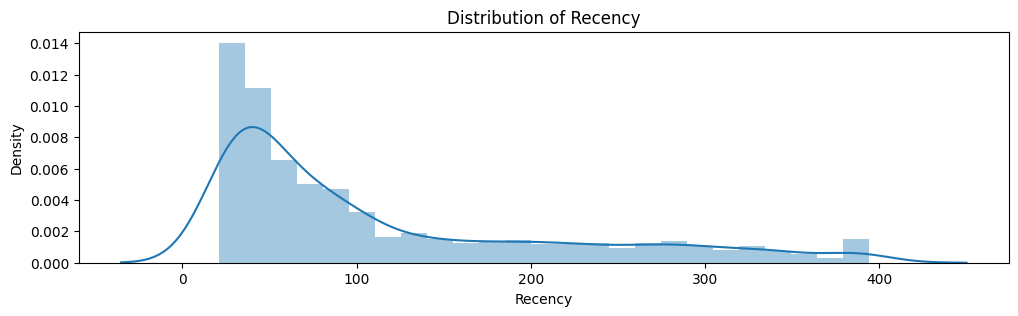

<ipython-input-128-437544758a47>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


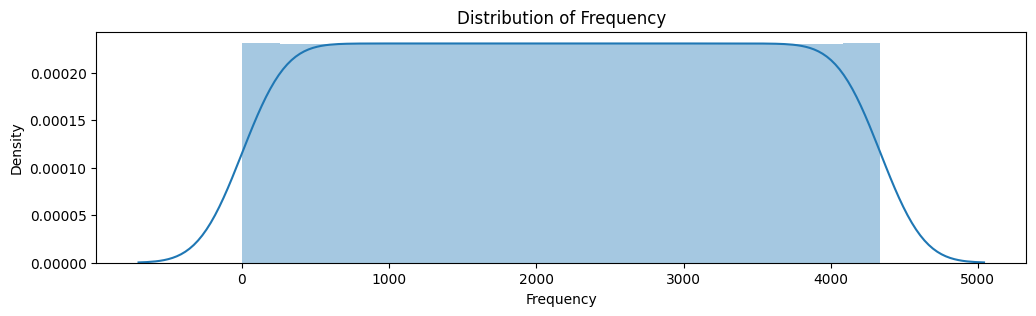

<ipython-input-128-437544758a47>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


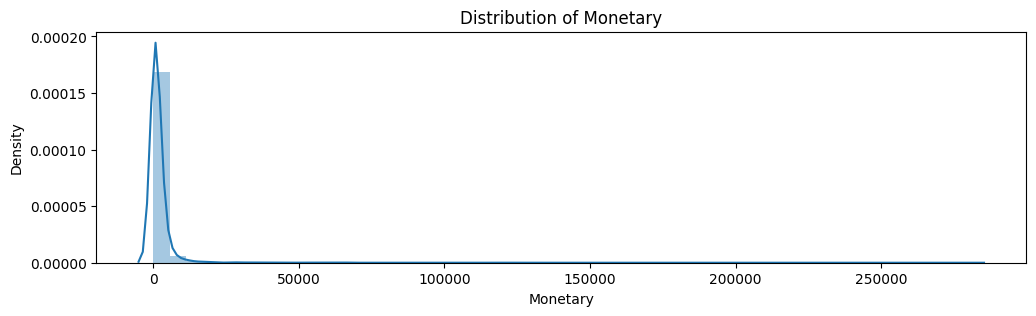

In [ ]:
colnames = ['Recency', 'Frequency', 'Monetary']
for col in colnames:
  fig, ax = plt.subplots(figsize=(12,3))
  sns.distplot(data[col])
  ax.set_title('Distribution of %s' % col)
  plt.show()

In [ ]:
!pip install squarify
import squarify


total_revenue = data["Monetary"].sum()
total_cust = data['CustomerID'].count()
data_chart = data.groupby("Segment").agg({"CustomerID": "count", "Monetary": "sum"}).reset_index()
data_chart['share'] = data_chart["CustomerID"]/total_cust
data_chart['share_revenue'] = data_chart["Monetary"]/total_revenue
data_chart

,Segment,CustomerID,Monetary,share,share_revenue
0,About To Sleep,283,77885.540,0.065237,0.008740
1,At Risk,422,751808.221,0.097280,0.084365
2,Cannot Lose Them,91,203671.300,0.020977,0.022855
3,Champions,835,5604376.680,0.192485,0.628899
4,Hibernating customers,696,285673.342,0.160443,0.032057
5,Lost customers,486,97405.610,0.112033,0.010930
6,Loyal,428,1021224.390,0.098663,0.114597
7,Need Attention,280,462835.741,0.064546,0.051937
8,New Customers,267,59755.620,0.061549,0.006706
9,Potential Loyalist,414,225740.110,0.095436,0.025332


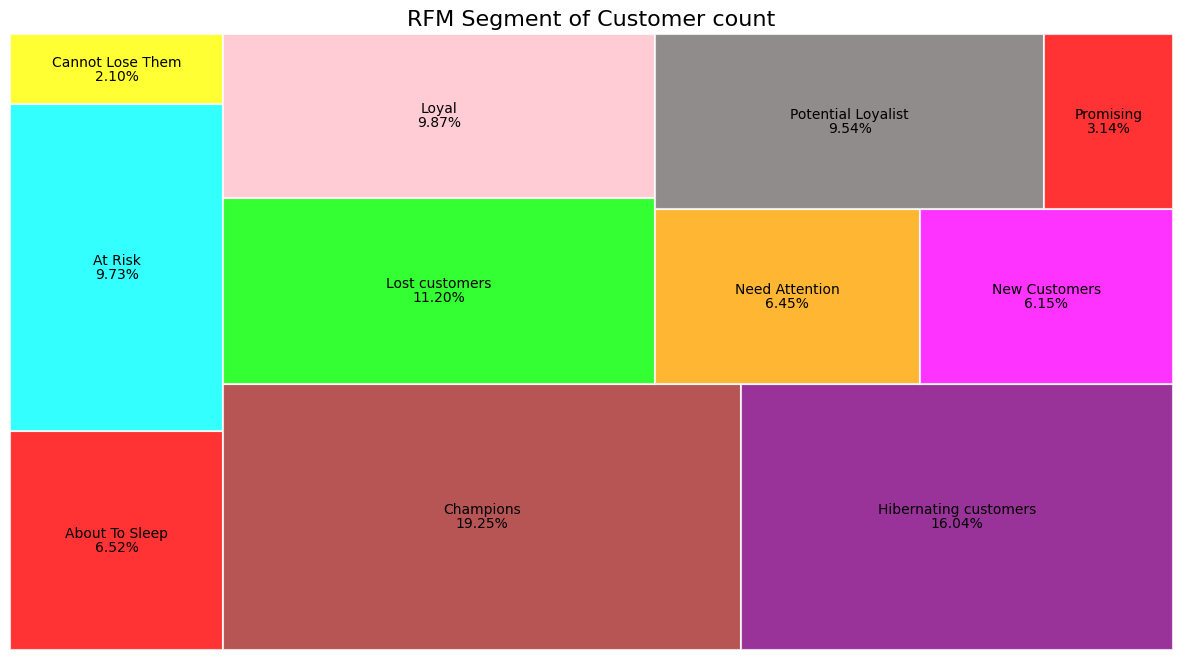

In [ ]:
colors = ['#FF0000', '#00FFFF', '#FFFF00', '#A52A2A', '#800080', '#00FF00', '#FFC0CB', '#FFA500', '#FF00FF', '#736F6E']

fig, ax = plt.subplots( 1 , figsize=(15,8))

squarify.plot(sizes = data_chart["CustomerID"],
              label= data_chart['Segment'],
              value = [f'{x*100:.2f}%' for x in data_chart['share']],
              alpha= .8,
              color=colors,
              bar_kwargs = dict(linewidth=1.5, edgecolor="white")
              )
plt.title('RFM Segment of Customer count', fontsize = 16)
plt.axis('off')
plt.show()

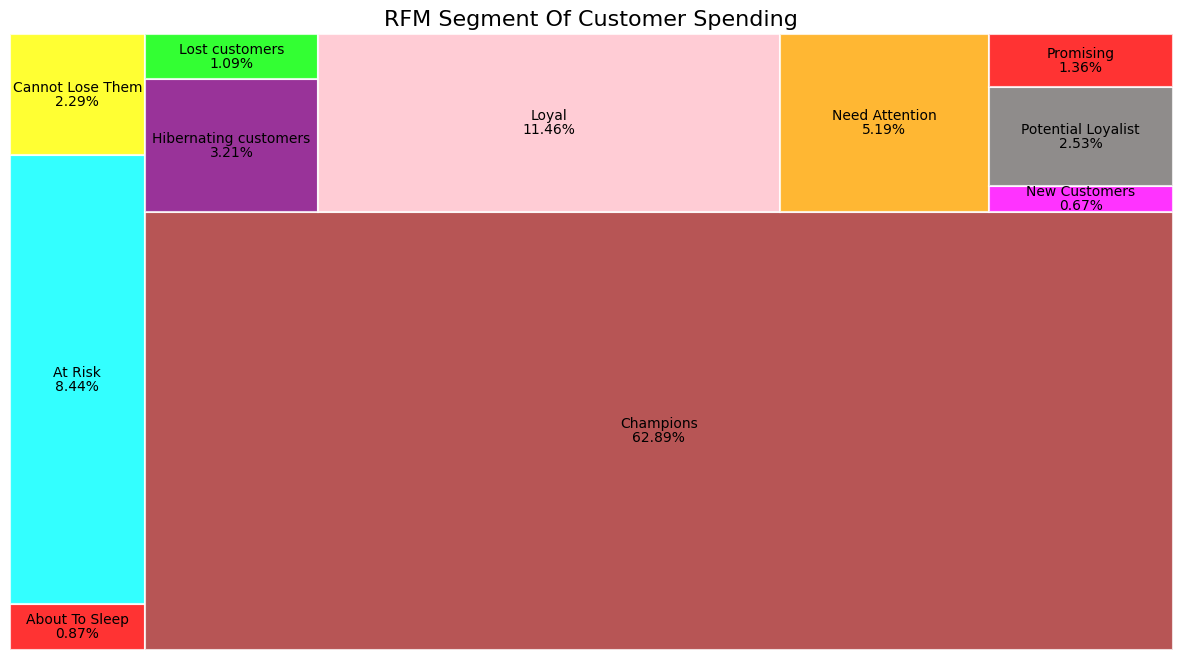

In [ ]:
colors = ['#FF0000', '#00FFFF', '#FFFF00', '#A52A2A', '#800080', '#00FF00', '#FFC0CB', '#FFA500', '#FF00FF', '#736F6E']

fig, ax = plt.subplots( 1 , figsize=(15,8))

squarify.plot(sizes = data_chart["Monetary"],
              label= data_chart['Segment'],
              value = [f'{x*100:.2f}%' for x in data_chart['share_revenue']],
              alpha= .8,
              color=colors,
              bar_kwargs = dict(linewidth=1.5, edgecolor="white")
              )
plt.title('RFM Segment Of Customer Spending', fontsize = 16)
plt.axis('off')
plt.show()